In [ ]:
#creates combat normalisation age curves for figure 2

from meld_classifier.paths import BASE_PATH, EXPERIMENT_PATH
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from pygam import LinearGAM,s
%matplotlib inline

In [2]:
site_codes=['H2', 'H3','H4','H5','H6','H7','H9','H10','H11','H12','H14','H15','H16','H17','H18','H19',
                  'H21','H23','H24','H26', 'H27',]
c_raw = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix.hdf5', dataset=None)
c_combat =  MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5', dataset=None)
listids = c_combat.get_subject_ids(site_codes=site_codes, lesional_only=True)

In [3]:
# To include a new site 
new_site = 'H27'
c_raw2 = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix.hdf5', dataset=None)
c_combat2 =  MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_NewSite.hdf5', dataset=None)
listids2 = c_combat2.get_subject_ids(site_codes=site_codes, lesional_only=True)
listids2 

['MELD_H27_3T_FCD_0001',
 'MELD_H27_3T_FCD_0002',
 'MELD_H27_3T_FCD_0003',
 'MELD_H27_3T_FCD_0004',
 'MELD_H27_3T_FCD_0005',
 'MELD_H27_3T_FCD_0006',
 'MELD_H27_3T_FCD_0007',
 'MELD_H27_3T_FCD_0008',
 'MELD_H27_3T_FCD_0009',
 'MELD_H27_3T_FCD_0010',
 'MELD_H27_3T_FCD_0011',
 'MELD_H27_3T_FCD_0012',
 'MELD_H27_3T_FCD_0013',
 'MELD_H27_3T_FCD_0014',
 'MELD_H27_3T_FCD_0015',
 'MELD_H27_3T_FCD_0016',
 'MELD_H27_3T_FCD_0017',
 'MELD_H27_3T_C_0018',
 'MELD_H27_3T_C_0019',
 'MELD_H27_3T_C_0020',
 'MELD_H27_3T_C_0021',
 'MELD_H27_3T_C_0022',
 'MELD_H27_3T_C_0023',
 'MELD_H27_3T_C_0024',
 'MELD_H27_3T_C_0025',
 'MELD_H27_3T_C_0026',
 'MELD_H27_3T_C_0027',
 'MELD_H27_3T_C_0028',
 'MELD_H27_3T_C_0029',
 'MELD_H27_3T_C_0030',
 'MELD_H27_3T_C_0031',
 'MELD_H27_3T_C_0032',
 'MELD_H27_3T_C_0033',
 'MELD_H27_3T_C_0034',
 'MELD_H27_3T_C_0035']

In [4]:
# get post combat values 
feature='.combat.on_lh.thickness.sm10.mgh'

ages=[]
raw_vals=[]
included_subjects=[]
sites=[]

for k,subject in enumerate(listids):
    subj = MeldSubject(subject, cohort=c_combat)
    vals = subj.load_feature_values(feature, hemi="lh")
    if vals.any()==0 :
        pass
    else:
        included_subjects.append(subject)
        raw_vals.append(vals)
        ages.append(subj.get_demographic_features('Age at preop'))
        sites.append(site_codes.index(subj.site_code))

if new_site :# to include new site 
    for k,subject in enumerate(listids2):
        subj = MeldSubject(subject, cohort=c_combat2)
        vals = subj.load_feature_values(feature, hemi="lh")
        if vals.any()==0 :
            pass
        else:
            included_subjects.append(subject)
            raw_vals.append(vals)
            ages.append(subj.get_demographic_features('Age at preop'))
            sites.append(site_codes.index(subj.site_code))
        
raw_vals=np.array(raw_vals)
ages=np.array(ages)
included_subjects=np.array(included_subjects)
sites=np.array(sites)

In [5]:
# get pre combat values
feature='.on_lh.thickness.mgh'

c_ages=[]
non_combat_raw_vals=[]
c_sites=[]

for k,subject in enumerate(included_subjects):
    subj = MeldSubject(subject, cohort=c_raw)
    vals = subj.load_feature_values(feature, hemi="lh")
    if vals.any()==0 :
        pass
    else:
        non_combat_raw_vals.append(vals)
        c_ages.append(subj.get_demographic_features('Age at preop'))
        c_sites.append(site_codes.index(subj.site_code))

non_combat_raw_vals=np.array(non_combat_raw_vals)
c_ages=np.array(c_ages)
c_sites=np.array(c_sites)

In [6]:
# get pre combat + normalisation values
feature='.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh'

norm_ages=[]
norm_combat_raw_vals=[]
norm_sites=[]

for k,subject in enumerate(listids):
    subj = MeldSubject(subject, cohort=c_combat)
    vals = subj.load_feature_values(feature, hemi="lh")
    if vals.any()==0 :
        pass
    else:
        norm_combat_raw_vals.append(vals)
        norm_ages.append(subj.get_demographic_features('Age at preop'))
        norm_sites.append(site_codes.index(subj.site_code))

if new_site:
    for k,subject in enumerate(listids2):
        subj = MeldSubject(subject, cohort=c_combat2)
        vals = subj.load_feature_values(feature, hemi="lh")
        if vals.any()==0 :
            pass
        else:
            norm_combat_raw_vals.append(vals)
            norm_ages.append(subj.get_demographic_features('Age at preop'))
            norm_sites.append(site_codes.index(subj.site_code))
        
norm_combat_raw_vals=np.array(norm_combat_raw_vals)
norm_ages=np.array(norm_ages)
norm_sites=np.array(norm_sites)

In [7]:
import matplotlib.pyplot as plt

def setup_font_size():
    SMALL_SIZE = 10
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 18

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    

In [2]:
6*100


600

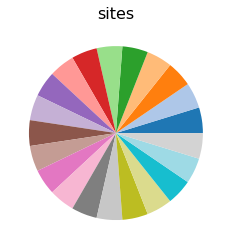

<Figure size 432x288 with 0 Axes>

In [66]:
# add legend pie chart with color from sites
from matplotlib import cm
f=plt.figure()
ax=f.add_subplot(111, aspect='equal')
sites_include = np.array(list(set(sites)))
a=np.ones(len(sites_include))/len(sites_include)
cs=cm.tab20(sites_include)
cs[-1] = [211/255,211/255,211/255,1] # to add the red for the new site
p=plt.pie(a, colors=cs)
plt.title('sites', fontsize=16)
plt.show()
#save 
output_path = '/rds/user/co-ripa1/hpc-work/processes/20210712_MELDpaperFigures/'
plt.savefig(os.path.join(output_path, 'legend_sites.png'))

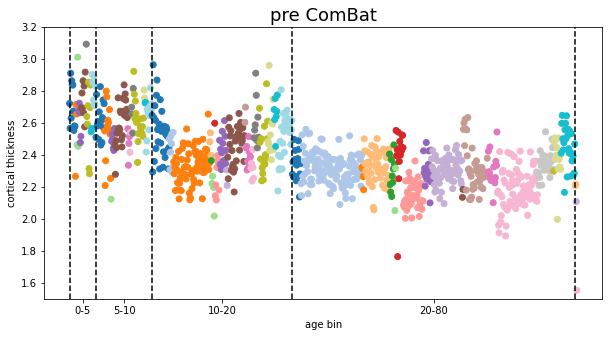

In [56]:
# plot pre combat
plt.figure(figsize=(10,5))

#remove nan
mask = ~pd.isnull(c_ages)
c_ages = c_ages[mask]
non_combat_raw_vals = non_combat_raw_vals[mask]
c_sites = c_sites[mask]

non_combat_raw_vals = non_combat_raw_vals[c_ages<80]
c_sites = c_sites[c_ages<80]
c_ages = c_ages[c_ages<80]
df = pd.DataFrame(np.vstack([c_ages,np.mean(non_combat_raw_vals,axis=1),c_sites]).T,
                 columns = ["age",'thickness','site'])
df['age_bins']=np.digitize(df['age'],[0,5,10,20,60])
df=df.sort_values(['age_bins','site'])
df['index']=np.arange(len(c_ages))


plt.scatter(df['index'],y=df['thickness'],c=df['site'],cmap='tab20')


plt.ylim([1.5,3.2])
u,c=np.unique(np.array(df['age_bins']),return_counts=True)
plt.plot([0,0],[1.5,3.2],'--',c='k')
old=0
age_bins=[0,5,10,20]

positions = []
for k,a in enumerate(age_bins):
    positions.append(np.mean([old,old+c[k]]))
    old+=c[k]
    plt.plot([old,old],[1.5,3.2],'--',c='k')
    
#age_ex=
age_bins.append(80)
labels=[]
for k,t in enumerate(np.arange(len(age_bins)-1)):
    labels.append(f'{age_bins[k]}-{age_bins[k+1]}')
    
plt.ylabel('cortical thickness')
plt.xlabel('age bin')
plt.xticks(positions,labels)
plt.title('pre ComBat' , size=18)

setup_font_size()

#save 
# output_path = '/rds/user/co-ripa1/hpc-work/processes/20210712_MELDpaperFigures/'
# plt.savefig(os.path.join(output_path, 'thicknessVSage_precomb_newsite.png'), dpi=96, transparent =True)

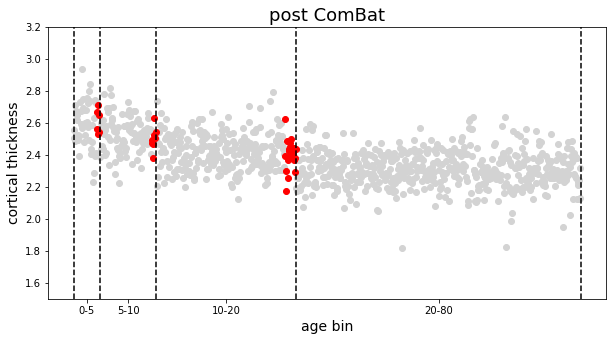

In [58]:
# plot post combat
plt.figure(figsize=(10,5))

mask = ~pd.isnull(ages)
ages = ages[mask]
raw_vals = raw_vals[mask]
sites = sites[mask]

raw_vals = raw_vals[ages<80]
sites = sites[ages<80]
ages = ages[ages<80]
df_c = pd.DataFrame(np.vstack([ages,np.mean(raw_vals,axis=1),sites]).T,
                 columns = ["age",'thickness','site'])
age_bins=[0,5,10,20]
df_c['age_bins']=np.digitize(df_c['age'],age_bins)
df_c=df_c.sort_values(['age_bins','site'])
df_c['index']=np.arange(len(c_ages))

if new_site:
    subdf=df_c[df_c['site']!=site_codes.index(new_site)]
    plt.scatter(subdf['index'],y=subdf['thickness'],c='lightgrey')
#     subdf=df[df['site']==site_codes.index(new_site)]  # to compare with pre combat new site
    subdf=df_c[df_c['site']==site_codes.index(new_site)]  # to compare with post combat new site
    plt.scatter(subdf['index'],y=subdf['thickness'],c='red')
else: 
    plt.scatter(subdf['index'],y=subdf['thickness'],c=subdf['site'],cmap='tab20')
plt.ylim([1.5,3.2])
u,c=np.unique(np.array(df_c['age_bins']),return_counts=True)
plt.plot([0,0],[1.5,3.2],'--',c='k')
old=0
positions = []
for k,a in enumerate(age_bins):
    positions.append(np.mean([old,old+c[k]]))
    old+=c[k]
    plt.plot([old,old],[1.5,3.2],'--',c='k')
    
#age_ex=
age_bins.append(80)
labels=[]
for k,t in enumerate(np.arange(len(age_bins)-1)):
    labels.append(f'{age_bins[k]}-{age_bins[k+1]}')
    
plt.ylabel('cortical thickness')
plt.xlabel('age bin')
plt.xticks(positions,labels)
plt.title('post ComBat', size=18)

setup_font_size()

#save 
output_path = '/rds/user/co-ripa1/hpc-work/processes/20210712_MELDpaperFigures/'
plt.savefig(os.path.join(output_path, 'thicknessVSage_postcomb_newsite.png'), dpi=96, transparent =True)

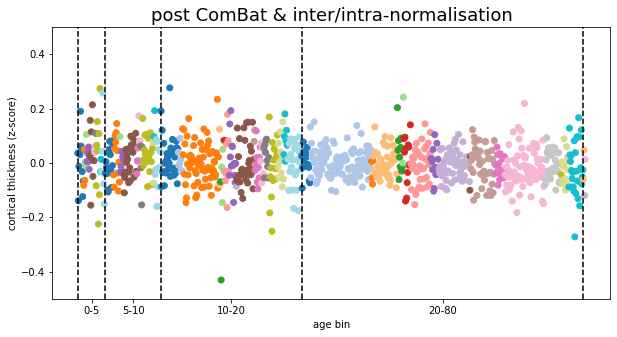

In [7]:
#plot post combat + normalisation 
plt.figure(figsize=(10,5))

mask = ~pd.isnull(norm_ages)
norm_ages = norm_ages[mask]
norm_combat_raw_vals = norm_combat_raw_vals[mask]
norm_sites = norm_sites[mask]

norm_combat_raw_vals = norm_combat_raw_vals[norm_ages<80]
norm_sites = norm_sites[norm_ages<80]
norm_ages = norm_ages[norm_ages<80]
df_norm = pd.DataFrame(np.vstack([norm_ages,np.mean(norm_combat_raw_vals,axis=1),norm_sites]).T,
                 columns = ["age",'thickness','site'])
df_norm['age_bins']=np.digitize(df_norm['age'],[0,5,10,20,60])
df_norm=df_norm.sort_values(['age_bins','site'])
df_norm['index']=np.arange(len(norm_ages))

plt.scatter(df_norm['index'],y=df_norm['thickness'],c=df_norm['site'],cmap='tab20')
plt.ylim([-0.5,0.5])
u,c=np.unique(np.array(df_norm['age_bins']),return_counts=True)
plt.plot([0,0],[-0.5,0.5],'--',c='k')
old=0
age_bins=[0,5,10,20]

positions = []
for k,a in enumerate(age_bins):
    positions.append(np.mean([old,old+c[k]]))
    old+=c[k]
    plt.plot([old,old],[-0.5,0.5],'--',c='k')
    
#age_ex=
age_bins.append(80)
labels=[]
for k,t in enumerate(np.arange(len(age_bins)-1)):
    labels.append(f'{age_bins[k]}-{age_bins[k+1]}')
    
plt.ylabel('cortical thickness (z-score)')
plt.xlabel('age bin')
plt.xticks(positions,labels)
plt.title('post ComBat & inter/intra-normalisation' , size=18)

setup_font_size()

# plt.savefig('ComBat + inter & intra normalisation.pdf')

## Not updated 

In [ ]:
# pats, pat_scanner=io.list_ids(site_codes,'patient',hdf5_file_root='{}_{}_featurematrix_combat_2.hdf5')
# conts, cont_scanner=io.list_ids(site_codes,'control',hdf5_file_root='{}_{}_featurematrix_combat_2.hdf5')


In [ ]:
# count = 0
# for subject in pats:
#      if '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh' in io.get_feature_list(subject,hdf5_file_root='{}_{}_featurematrix_combat_2.hdf5'):
#         count+=1
        
# print(count)

In [ ]:
# import matplotlib_surface_plotting as msp
# import nibabel as nb
# thickness=np.mean(raw_vals[sites==18],axis=0)
# v,f = nb.freesurfer.io.read_geometry(os.path.join(paths.BASE_PATH,'fsaverage_sym','surf','lh.inflated'))

In [ ]:
# msp.plot_surf(v,f,thickness,vmin=1,vmax=4)

In [51]:
raw_vals=raw_vals[ages<60]
ages=ages[ages<60]

In [52]:
#sns.regplot(ages,raw_vals[:,vertex],lowess=True)

NameError: name 'vertex' is not defined

In [7]:
import nibabel as nb
cortex=os.path.join(paths.BASE_PATH,'fsaverage_sym','label','lh.cortex.label')
cortex=np.sort(nb.freesurfer.io.read_label(cortex))
vertex_peak = np.zeros(raw_vals.shape[1])
XX=np.arange(50)+np.min(ages)
for vertex in cortex:
    if vertex%1000==0:
        print(vertex)
    y=raw_vals[:,vertex]
    X=ages
    gam = LinearGAM(s(0,n_splines=5)).fit(X, y)
    i=0
    yy=gam.predict( X=XX)
    vertex_peak[vertex]=XX[np.argmax(yy)]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
24000
25000
26000
28000
29000
30000
31000
32000
33000
35000
36000
37000
38000
39000
40000
41000


KeyboardInterrupt: 

In [13]:
reduced = vertex_peak[:vertex]

In [14]:
import pool.mesh_tools as mt

def interpolate_values(values):
 #   """interpolate out to full mesh resolution"""
    import stripy
    sphere = nb.freesurfer.io.read_geometry(os.path.join(paths.BASE_PATH,'fsaverage_sym','surf','lh.sphere'))
    spherical=mt.spherical_np(sphere[0])
    lats,lons = spherical[:,1]-np.pi/2,spherical[:,2]
    mesh=stripy.sTriangulation(lons[:len(values)],lats[:len(values)])
    interpolated_values=mesh.interpolate_nearest(lons,lats,values)[0]
    return interpolated_values


In [15]:
full = interpolate_values(reduced)

In [16]:
import pool.matplotlib_surface_plotting as msp


plotting


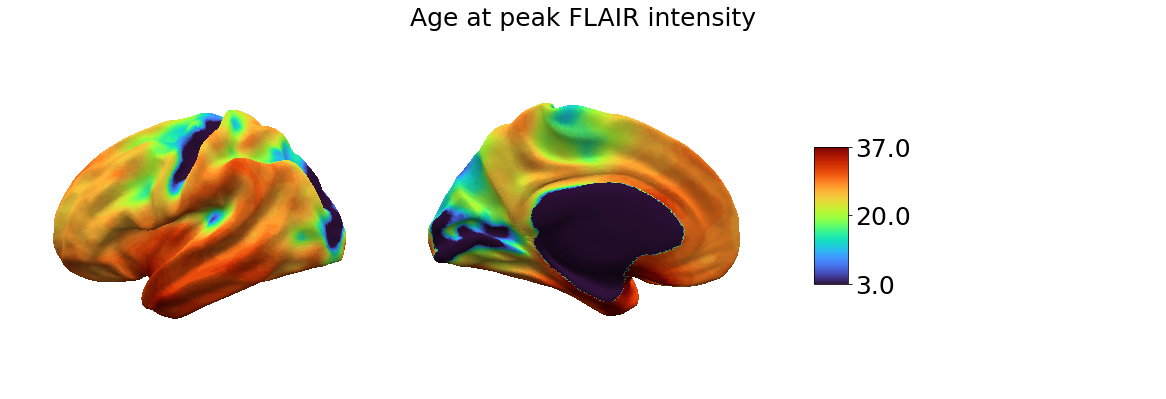

In [28]:
surf = nb.freesurfer.io.read_geometry(os.path.join(paths.BASE_PATH,
                                                   'fsaverage_sym','surf','lh.partial_inflated'))

msp.plot_surf(surf[0],surf[1], full,
              title='Age at peak FLAIR intensity',
              rotate=[90,270],vmax=np.percentile(full[cortex],99),vmin=np.percentile(full[cortex],5),cmap='turbo')



plotting


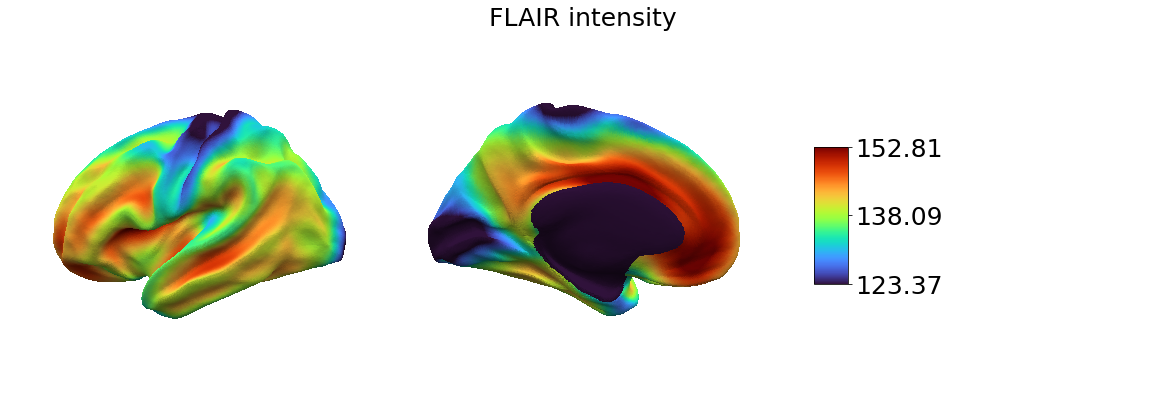

In [29]:
mean_flair = np.mean(raw_vals,axis=0)
msp.plot_surf(surf[0],surf[1], mean_flair,
              title='FLAIR intensity',
              rotate=[90,270],vmax=np.percentile(mean_flair[cortex],99),vmin=np.percentile(mean_flair[cortex],5),cmap='turbo')



In [31]:
import scipy.stats as stats
stats.spearmanr(mean_flair[cortex],full[cortex])

SpearmanrResult(correlation=0.4406433219869251, pvalue=0.0)

Text(0.5, 0, 'Age')

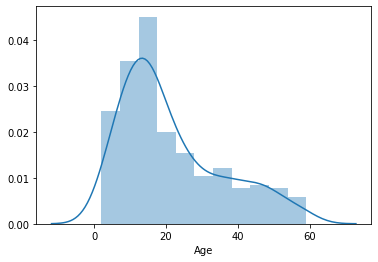

In [34]:
sns.distplot(ages)
plt.xlabel('Age')

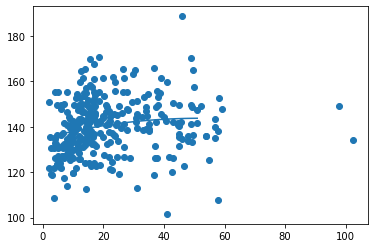

In [183]:
plt.scatter(X,y)
plt.plot(XX, yy)


In [ ]:
plt.plot(XX, yy)
